# SMS Spam Classifier using Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building
    - Model evaluation

We will be using a dataset from the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. The direct data link is https://archive.ics.uci.edu/dataset/228/sms+spam+collection



### 1. Importing and Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# reading the training data
docs = pd.read_csv('/content/smsspamcollection.csv',names=['label','sms_message'])
docs.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The first column takes two values, 'ham' which signifies that the message is not spam, and 'spam' which signifies that the message is spam.

The second column is the text content of the SMS message that is being classified.

In [ ]:
# number of SMSes / documents
len(docs)

5572

In [ ]:
# counting spam and ham instances
ham_spam = docs['label'].value_counts()
ham_spam

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
print("spam rate is about {0}%".format(
    round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

spam rate is about 13%


## 2. Data Preprocessing

We need to convert the values in the 'label' column to numerical values using map method. This maps the 'ham' value to 0 and the 'spam' value to 1.

In [ ]:
# mapping labels to 0 and 1
docs['label'] = docs.label.map({'ham':0, 'spam':1})

In [ ]:
docs.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# convert to X and y
X = docs.sms_message
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


## 3. Split data into separate training and test set

Split the dataset into a training and testing set using the train_test_split method in sklearn. Split the data using the following variables:

* X_train is our training data for the 'sms_message' column.
* y_train is our training data for the 'label' column
* X_test is our testing data for the 'sms_message' column.
* y_test is our testing data for the 'label' column.

In [ ]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
print('Number of rows in the total set: {}'.format(docs.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


#### Applying Bag of Words processing to our dataset.
Now that we have split the data, our next objective is to follow "Bag of Words" and convert our data into the desired matrix format. To do this we will be using CountVectorizer(). There are two steps to consider here:

* First, we have to fit our training data (X_train) into CountVectorizer() and return the matrix.
* Secondly, we have to transform our testing data (X_test) to return the matrix.

Note that X_train is our training data for the 'sms_message' column in our dataset and we will be using this to train our model.

X_test is our testing data for the 'sms_message' column and this is the data we will be using (after transformation to a matrix) to make predictions on. We will then compare those predictions with y_test in a later step.

In [ ]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [ ]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [ ]:
# printing the vocabulary
vect.vocabulary_

{'4mths': 509,
 'half': 3089,
 'price': 5027,
 'orange': 4626,
 'line': 3852,
 'rental': 5310,
 'latest': 3763,
 'camera': 1527,
 'phones': 4822,
 'free': 2780,
 'phone': 4818,
 '11mths': 264,
 'mobilesdirect': 4248,
 '08000938767': 50,
 'update': 6674,
 'or2stoptxt': 4624,
 'cs': 1971,
 'did': 2169,
 'stitch': 6028,
 'trouser': 6545,
 'hope': 3260,
 'enjoyed': 2436,
 'new': 4442,
 'content': 1867,
 'text': 6321,
 'stop': 6038,
 '61610': 563,
 'unsubscribe': 6666,
 'help': 3180,
 '08712400602450p': 98,
 'provided': 5089,
 'tones2you': 6473,
 'uk': 6615,
 'heard': 3159,
 'u4': 6608,
 'rude': 5443,
 'chat': 1643,
 'private': 5040,
 '01223585334': 5,
 'cum': 1989,
 'wan': 6853,
 '2c': 374,
 'pics': 4837,
 'gettin': 2913,
 'shagged': 5628,
 'pix': 4858,
 '8552': 660,
 '2end': 378,
 'send': 5590,
 'sam': 5487,
 'xxx': 7128,
 'neva': 4438,
 'tell': 6289,
 'noe': 4477,
 'home': 3244,
 'da': 2015,
 'aft': 826,
 'wat': 6877,
 'wiskey': 7013,
 'brandy': 1389,
 'rum': 5450,
 'gin': 2927,
 'beer':

In [ ]:
# vocab size
len(vect.vocabulary_.keys())

7204

In [ ]:
# printing feature names
print(vect.get_feature_names_out())
print(len(vect.get_feature_names_out()))

['00' '000' '008704050406' ... 'zouk' 'zyada' 'èn']
7204


In [ ]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test_transformed = vect.transform(X_test)

### Building and Evaluating the Model

**Naive Bayes Implementation**

We will be using sklearn's sklearn.naive_bayes method to make predictions on our SMS messages dataset.

Specifically, we will be using the multinomial Naive Bayes algorithm. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification)

In the next step, we shall be incorporating the Naive Bayes Classifier and training it on the Train Data. Once trained, it will be used to predict the outputs from the test data set

In [ ]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()

# fit
mnb_model.fit(X_train_transformed,y_train)

# predict class
y_pred = mnb_model.predict(X_test_transformed)

### Model Evaluation

<Axes: >

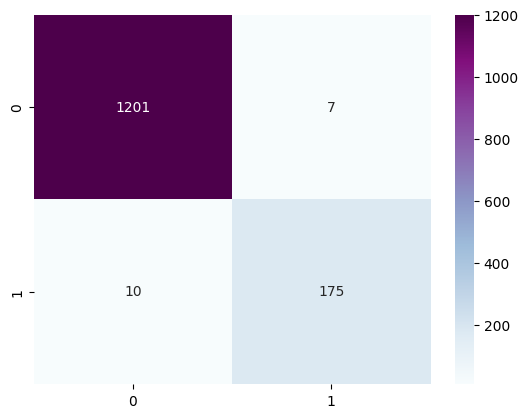

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

Observations:

Its now time that we analyze the results:-

* 1201 Non-Spam SMSs have been correctly classified
* 175 Spam SMSs have been correctly classified
* 7 Non-Spam SMSs have been classified as Spam SMSs (False Positives or Type I Error)
* 10 Spam SMSs have been classified as Non-Spam (False Negatives or Type II Error)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred)))
print('The area under the curve is: {0:0.2f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy score: 0.99
Precision score: 0.96
Recall score: 0.95
F1 score: 0.95
The area under the curve is: 0.97


## k-Fold Cross Validation

In [ ]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(mnb_model, X_train_transformed, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.97129187 0.97368421 0.97368421 0.97368421 0.98086124 0.9784689
 0.98325359 0.97368421 0.9784689  0.96882494]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9756


In [ ]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(mnb_model, X_train_transformed, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9858


#### Interpretation
Using the mean cross-validation, we can conclude that we expect the model to be around 97% accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 96.88% accuracy to 98.32% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

Our original model accuracy is 0.99, but the mean cross-validation accuracy is 0.9858. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

## OPTIONAL - Evaluating Other models
We're creating 3 different types of model for our SMS Classifier problem:

* Bernoulli Naive Bayes (BernoulliNB)
* Linear Support Vector Classification (LinearSVC)
* Logistic Regression (LR)

Since our dataset is not skewed, i.e. it has equal number of Positive and Negative Predictions. We're choosing Accuracy as our evaluation metric. Furthermore, we're plotting the Confusion Matrix to get an understanding of how our model is performing on both classification types.

In [ ]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test_transformed)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Negative','False Positive', 'False Negative','True Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()
    print('\n')

    roc_auc = roc_auc_score(y_test, y_pred)
    print("The area under the curve is: %0.2f"%roc_auc)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) # ROC curve
    #Setting the graph area
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    #Plotting the worst line possiple
    plt.plot([0, 1], [0, 1],'b--')

    #Plotting the logistic regression we have built
    plt.plot(fpr, tpr, color='darkorange', label= 'AUC= %0.2f' % roc_auc)

    #Adding labels and etc
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')

Classification report is a way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

**BernoulliNB Model**

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1208
           1       0.99      0.60      0.75       185

    accuracy                           0.95      1393
   macro avg       0.97      0.80      0.86      1393
weighted avg       0.95      0.95      0.94      1393



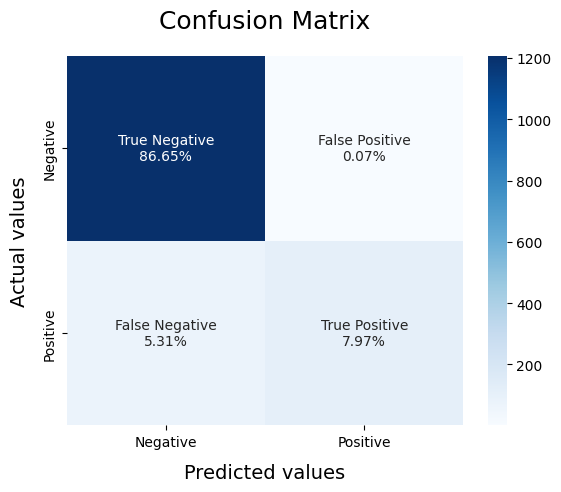



The area under the curve is: 0.80


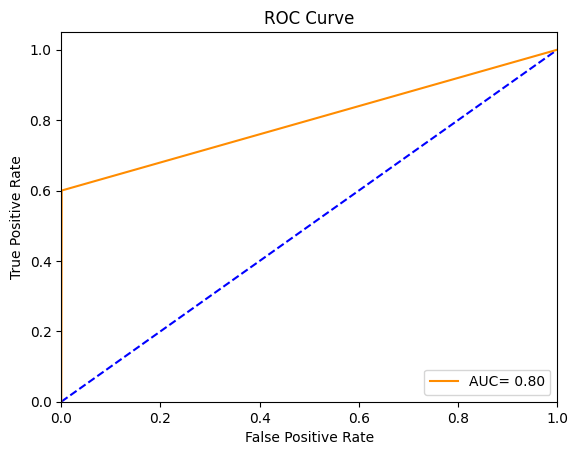

In [ ]:
bnb_model = BernoulliNB(alpha = 2)
bnb_model.fit(X_train_transformed, y_train)
model_Evaluate(bnb_model)

**LinearSVC Model**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       0.99      0.89      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



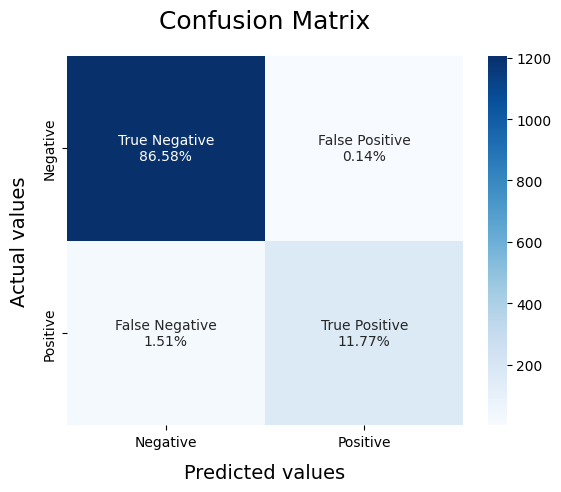



The area under the curve is: 0.94


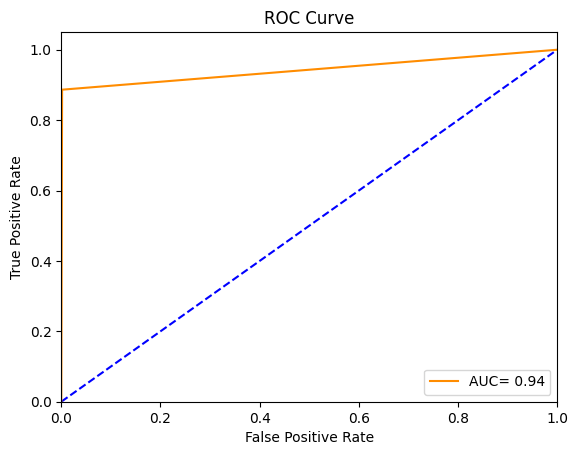

In [ ]:
svc_model = LinearSVC()
svc_model.fit(X_train_transformed, y_train)
model_Evaluate(svc_model)

**Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1208
           1       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



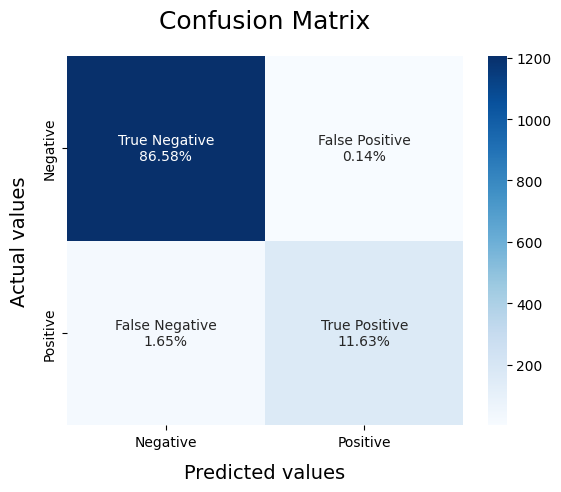



The area under the curve is: 0.94


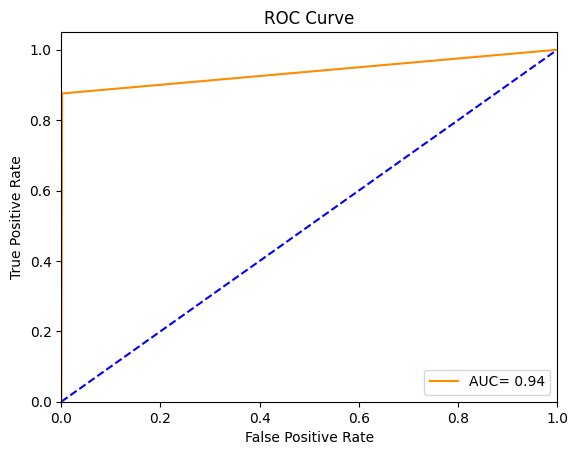

In [ ]:
logistic_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
logistic_model.fit(X_train_transformed, y_train)
model_Evaluate(logistic_model)

We can clearly see that the Logistic Regression Model performs the best out of all the different models that we tried. It achieves nearly 82% accuracy while classifying SMS as Spam or Ham.
